<a href="https://colab.research.google.com/github/thavha/Regression-predict-group-5/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Preprocessing**
Importing Liabraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Importing the data set** and checking the data

In [0]:
dataset = pd.read_csv('Train.csv')
dataset_test = pd.read_csv('Test.csv')


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

selecting only the rlevent  columns that will be used for the model and replacing white space with _ on columns names

In [0]:
new_df = dataset[['User Id','Platform Type','Personal or Business','Placement - Day of Month','Placement - Weekday (Mo = 1)','Placement - Time','Confirmation - Time','Arrival at Pickup - Time','Arrival at Destination - Time','Distance (KM)','Temperature','Rider Id','Time from Pickup to Arrival']].copy()
new_df.columns = [col.replace(" ","_") for col in new_df.columns] 
dataset_test  = dataset[['User Id','Platform Type','Personal or Business','Placement - Day of Month','Placement - Weekday (Mo = 1)','Placement - Time','Confirmation - Time','Arrival at Pickup - Time','Arrival at Destination - Time','Distance (KM)','Temperature','Rider Id','Time from Pickup to Arrival']].copy()
dataset_test.columns = [col.replace(" ","_") for col in dataset_test.columns] 


In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User_Id                        21201 non-null  object 
 1   Platform_Type                  21201 non-null  int64  
 2   Personal_or_Business           21201 non-null  object 
 3   Placement_-_Day_of_Month       21201 non-null  int64  
 4   Placement_-_Weekday_(Mo_=_1)   21201 non-null  int64  
 5   Placement_-_Time               21201 non-null  object 
 6   Confirmation_-_Time            21201 non-null  object 
 7   Arrival_at_Pickup_-_Time       21201 non-null  object 
 8   Arrival_at_Destination_-_Time  21201 non-null  object 
 9   Distance_(KM)                  21201 non-null  int64  
 10  Temperature                    16835 non-null  float64
 11  Rider_Id                       21201 non-null  object 
 12  Time_from_Pickup_to_Arrival    21201 non-null 

encoding personal or business column


In [7]:
new_df = pd.get_dummies(new_df, columns=['Personal_or_Business'], prefix = ['personal'])
new_df = new_df.iloc[:, :-1]
new_df.columns = [*new_df.columns[:-1], 'Business']
new_df.head()
new_df.info()

dataset_test = pd.get_dummies(dataset_test, columns=['Personal_or_Business'], prefix = ['personal'])
dataset_test = dataset_test.iloc[:, :-1]
dataset_test.columns = [*dataset_test.columns[:-1], 'Business']
dataset_test.head()
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User_Id                        21201 non-null  object 
 1   Platform_Type                  21201 non-null  int64  
 2   Placement_-_Day_of_Month       21201 non-null  int64  
 3   Placement_-_Weekday_(Mo_=_1)   21201 non-null  int64  
 4   Placement_-_Time               21201 non-null  object 
 5   Confirmation_-_Time            21201 non-null  object 
 6   Arrival_at_Pickup_-_Time       21201 non-null  object 
 7   Arrival_at_Destination_-_Time  21201 non-null  object 
 8   Distance_(KM)                  21201 non-null  int64  
 9   Temperature                    16835 non-null  float64
 10  Rider_Id                       21201 non-null  object 
 11  Time_from_Pickup_to_Arrival    21201 non-null  int64  
 12  Business                       21201 non-null 

dealing with the missing valuse replace with the mean/median temperature 

In [8]:
new_df['Temperature'] = new_df.Temperature.fillna(new_df.Temperature.median())
new_df.head()
new_df.info()

dataset_test['Temperature'] = dataset_test.Temperature.fillna(dataset_test.Temperature.median())
dataset_test.head()
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User_Id                        21201 non-null  object 
 1   Platform_Type                  21201 non-null  int64  
 2   Placement_-_Day_of_Month       21201 non-null  int64  
 3   Placement_-_Weekday_(Mo_=_1)   21201 non-null  int64  
 4   Placement_-_Time               21201 non-null  object 
 5   Confirmation_-_Time            21201 non-null  object 
 6   Arrival_at_Pickup_-_Time       21201 non-null  object 
 7   Arrival_at_Destination_-_Time  21201 non-null  object 
 8   Distance_(KM)                  21201 non-null  int64  
 9   Temperature                    21201 non-null  float64
 10  Rider_Id                       21201 non-null  object 
 11  Time_from_Pickup_to_Arrival    21201 non-null  int64  
 12  Business                       21201 non-null 

dealing with time columns

In [0]:
new_df['Placement_-_Time 24'] = (pd.to_datetime(new_df['Placement_-_Time'].str.strip(), format='%I:%M:%S %p')
                  .dt.strftime('%H:%M'))
new_df['Confirmation_-_Time 24'] = (pd.to_datetime(new_df['Confirmation_-_Time'].str.strip(), format='%I:%M:%S %p')
                  .dt.strftime('%H:%M'))
new_df['Arrival_at_Pickup_-_Time 24'] = (pd.to_datetime(new_df['Arrival_at_Pickup_-_Time'].str.strip(), format='%I:%M:%S %p')
                  .dt.strftime('%H:%M'))
new_df['Arrival_at_Destination_-_Time 24'] = (pd.to_datetime(new_df['Arrival_at_Destination_-_Time'].str.strip(), format='%I:%M:%S %p')
                  .dt.strftime('%H:%M'))



dataset_test['Placement_-_Time 24'] = (pd.to_datetime(new_df['Placement_-_Time'].str.strip(), format='%I:%M:%S %p')
                  .dt.strftime('%H:%M'))
dataset_test['Confirmation_-_Time 24'] = (pd.to_datetime(new_df['Confirmation_-_Time'].str.strip(), format='%I:%M:%S %p')
                  .dt.strftime('%H:%M'))
dataset_test['Arrival_at_Pickup_-_Time 24'] = (pd.to_datetime(new_df['Arrival_at_Pickup_-_Time'].str.strip(), format='%I:%M:%S %p')
                  .dt.strftime('%H:%M'))
dataset_test['Arrival_at_Destination_-_Time 24'] = (pd.to_datetime(new_df['Arrival_at_Destination_-_Time'].str.strip(), format='%I:%M:%S %p')
                  .dt.strftime('%H:%M'))

In [10]:
new_df.head()

,User_Id,Platform_Type,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Time,Arrival_at_Pickup_-_Time,Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Rider_Id,Time_from_Pickup_to_Arrival,Business,Placement_-_Time 24,Confirmation_-_Time 24,Arrival_at_Pickup_-_Time 24,Arrival_at_Destination_-_Time 24
0,User_Id_633,3,9,5,9:35:46 AM,9:40:10 AM,10:04:47 AM,10:39:55 AM,4,20.4,Rider_Id_432,745,1,09:35,09:40,10:04,10:39
1,User_Id_2285,3,12,5,11:16:16 AM,11:23:21 AM,11:40:22 AM,12:17:22 PM,16,26.4,Rider_Id_856,1993,0,11:16,11:23,11:40,12:17
2,User_Id_265,3,30,2,12:39:25 PM,12:42:44 PM,12:49:34 PM,1:00:38 PM,3,23.5,Rider_Id_155,455,1,12:39,12:42,12:49,13:00
3,User_Id_1402,3,15,5,9:25:34 AM,9:26:05 AM,9:37:56 AM,10:05:27 AM,9,19.2,Rider_Id_855,1341,1,09:25,09:26,09:37,10:05
4,User_Id_1737,1,13,1,9:55:18 AM,9:56:18 AM,10:03:53 AM,10:25:37 AM,9,15.4,Rider_Id_770,1214,0,09:55,09:56,10:03,10:25


In [11]:
new_df.drop(['Placement_-_Time', 'Confirmation_-_Time','Arrival_at_Pickup_-_Time','Arrival_at_Destination_-_Time','User_Id','Rider_Id'], axis=1)

dataset_test.drop(['Placement_-_Time', 'Confirmation_-_Time','Arrival_at_Pickup_-_Time','Arrival_at_Destination_-_Time','User_Id','Rider_Id'], axis=1)

,Platform_Type,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Distance_(KM),Temperature,Time_from_Pickup_to_Arrival,Business,Placement_-_Time 24,Confirmation_-_Time 24,Arrival_at_Pickup_-_Time 24,Arrival_at_Destination_-_Time 24
0,3,9,5,4,20.4,745,1,09:35,09:40,10:04,10:39
1,3,12,5,16,26.4,1993,0,11:16,11:23,11:40,12:17
2,3,30,2,3,23.5,455,1,12:39,12:42,12:49,13:00
3,3,15,5,9,19.2,1341,1,09:25,09:26,09:37,10:05
4,1,13,1,9,15.4,1214,0,09:55,09:56,10:03,10:25
...,...,...,...,...,...,...,...,...,...,...,...
21196,3,20,3,3,28.6,9,0,15:54,15:55,15:58,16:20
21197,3,13,6,7,26.0,770,1,10:13,10:13,10:20,10:46
21198,3,7,4,20,29.2,2953,1,17:06,17:07,17:30,18:40
21199,1,4,3,13,15.0,1380,0,09:31,09:31,09:38,10:08


In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   User_Id                           21201 non-null  object 
 1   Platform_Type                     21201 non-null  int64  
 2   Placement_-_Day_of_Month          21201 non-null  int64  
 3   Placement_-_Weekday_(Mo_=_1)      21201 non-null  int64  
 4   Placement_-_Time                  21201 non-null  object 
 5   Confirmation_-_Time               21201 non-null  object 
 6   Arrival_at_Pickup_-_Time          21201 non-null  object 
 7   Arrival_at_Destination_-_Time     21201 non-null  object 
 8   Distance_(KM)                     21201 non-null  int64  
 9   Temperature                       21201 non-null  float64
 10  Rider_Id                          21201 non-null  object 
 11  Time_from_Pickup_to_Arrival       21201 non-null  int64  
 12  Busi

spliting data into X and Y , first converting time into hours lapse since the day started

In [0]:
new_df = new_df[['Platform_Type', 'Arrival_at_Pickup_-_Time 24','Confirmation_-_Time 24','Placement_-_Time 24','Business','Temperature','Distance_(KM)','Placement_-_Weekday_(Mo_=_1)','Placement_-_Day_of_Month','Platform_Type', 'Arrival_at_Destination_-_Time 24', 'Time_from_Pickup_to_Arrival']]
new_df['Placement_-_Time 24'] = new_df['Placement_-_Time 24'].str.replace(':','.')
new_df['Confirmation_-_Time 24'] = new_df['Confirmation_-_Time 24'].str.replace(':','.')
new_df['Arrival_at_Pickup_-_Time 24'] = new_df['Arrival_at_Pickup_-_Time 24'].str.replace(':','.')
new_df['Arrival_at_Destination_-_Time 24'] = new_df['Arrival_at_Destination_-_Time 24'].str.replace(':','.')
new_df.head()


dataset_test = dataset_test[['Platform_Type', 'Arrival_at_Pickup_-_Time 24','Confirmation_-_Time 24','Placement_-_Time 24','Business','Temperature','Distance_(KM)','Placement_-_Weekday_(Mo_=_1)','Placement_-_Day_of_Month','Platform_Type', 'Arrival_at_Destination_-_Time 24', 'Time_from_Pickup_to_Arrival']]
dataset_test['Placement_-_Time 24'] = dataset_test['Placement_-_Time 24'].str.replace(':','.')
dataset_test['Confirmation_-_Time 24'] = dataset_test['Confirmation_-_Time 24'].str.replace(':','.')
dataset_test['Arrival_at_Pickup_-_Time 24'] = dataset_test['Arrival_at_Pickup_-_Time 24'].str.replace(':','.')
dataset_test['Arrival_at_Destination_-_Time 24'] = dataset_test['Arrival_at_Destination_-_Time 24'].str.replace(':','.')



In [0]:
x =pd.DataFrame(new_df.iloc[:,:-1].values)
y = new_df.iloc[:,-1].values


x_test =pd.DataFrame(new_df.iloc[:,:-1].values)
y_test= new_df.iloc[:,-1].values

Rescaling the x values using standardisation

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
x_standardise = pd.DataFrame(X_scaled,columns=x.columns)
x_standardise.head()



,0,1,2,3,4,5,6,7,8,9,10
0,0.396406,-1.147546,-1.315511,-1.294933,0.468583,-0.902320,-0.971370,1.122927,-0.756213,0.396406,-1.254938
1,0.396406,-0.612914,-0.595513,-0.578807,-2.134095,0.959066,1.145469,1.122927,-0.415254,0.396406,-0.558816
2,0.396406,-0.184422,-0.127317,-0.092157,0.468583,0.059396,-1.147774,-0.791244,1.630501,0.396406,-0.234220
3,0.396406,-1.410931,-1.370593,-1.334498,0.468583,-1.274597,-0.089354,1.122927,-0.074294,0.396406,-1.387905
4,-2.802759,-1.151477,-1.252560,-1.215803,-2.134095,-2.453475,-0.089354,-1.429301,-0.301601,-2.802759,-1.309689


In [26]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaledtest = scaler.fit_transform(x_test)
x_standardisetest = pd.DataFrame(x_scaledtest,columns=x.columns)
x_standardisetest.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.396406,-1.147546,-1.315511,-1.294933,0.468583,-0.902320,-0.971370,1.122927,-0.756213,0.396406,-1.254938
1,0.396406,-0.612914,-0.595513,-0.578807,-2.134095,0.959066,1.145469,1.122927,-0.415254,0.396406,-0.558816
2,0.396406,-0.184422,-0.127317,-0.092157,0.468583,0.059396,-1.147774,-0.791244,1.630501,0.396406,-0.234220
3,0.396406,-1.410931,-1.370593,-1.334498,0.468583,-1.274597,-0.089354,1.122927,-0.074294,0.396406,-1.387905
4,-2.802759,-1.151477,-1.252560,-1.215803,-2.134095,-2.453475,-0.089354,-1.429301,-0.301601,-2.802759,-1.309689


training a model using lasso

In [82]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_standardise, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1512229225.2995234, tolerance: 2066371.650150738
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1512229225.2995234, tolerance: 2066371.650150738
  positive)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
from sklearn import metrics
train_lasso = lasso.predict(X_standardise)
#test_lasso = lasso.predict(X_test)

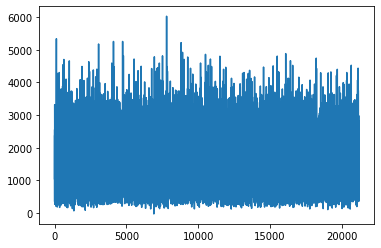

In [86]:
plt.plot(np.arange(1,21202), lasso.predict(X_standardise), label='LASSO')

training using simple linear 

In [27]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(x_standardise, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred= regressor.predict(x_test)
np.set_printoptions(precision=2)
f=pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_pred),1)), 1))
f.head()

,0,1
0,5245.805127,745.0
1,9683.577392,1993.0
2,4663.549853,455.0
3,7102.960986,1341.0
4,6115.589892,1214.0
